<a href="https://colab.research.google.com/github/JoshDumo/QuantumChem/blob/main/QiskitQuantumChemistry_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit[visualizations]

     |████████████████████████████████| 6.0MB 7.7MB/s 
     |████████████████████████████████| 17.9MB 168kB/s 
     |████████████████████████████████| 204kB 53.0MB/s 
     |████████████████████████████████| 215kB 54.0MB/s 
     |████████████████████████████████| 2.1MB 49.8MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 1.0MB 47.5MB/s 
     |████████████████████████████████| 194kB 60.7MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 614kB 49.6MB/s 
     |████████████████████████████████| 3.2MB 43.9MB/s 
     |████████████████████████████████| 5.5MB 44.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.25.1-cp37-none-any.whl size=3064 sha256=21cb62ea4fa2fd2cd1c14d85ac2502e70f325eab01903a9c660abb64bdd2a261
  Stored in directory: /root/.cache/pip/wheels/e2/00/23/7328e187ec5202e637b2fb6b2a0c68029758c90abded1eee60
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py

In [ ]:
!pip install pyscf

     |████████████████████████████████| 29.7MB 94kB/s 


In [ ]:
import numpy as np
import pylab
import copy
from qiskit import BasicAer
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.chemistry.components.initial_states import HartreeFock
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian, QubitMappingType

/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/__init__.py:170: DeprecationWarning: The package qiskit.chemistry is deprecated. It was moved/refactored to qiskit_nature (pip install qiskit-nature). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('chemistry', 'qiskit_nature', 'qiskit-nature')


In [ ]:
molecule = 'H .0 .0 -{0}; Li .0 .0 {0}'
distances = np.arange(0.5, 4.5, 0.25)
vqe_energies = []
hf_energies = []
exact_energies = []



In [ ]:
for i,d in enumerate(distances):
  print('step: ', i)

  #experiment
  driver = PySCFDriver(molecule.format(d/2), basis='sto3g')
  qmolecule = driver.run()
  operator = Hamiltonian(qubit_mapping=QubitMappingType.PARITY, two_qubit_reduction=True, freeze_core=True, orbital_reduction=[-3,-2])
  
  qubit_op, aux_ops = operator.run(qmolecule)

  #exact results
  exact_result = NumPyMinimumEigensolver(qubit_op, aux_operators=aux_ops).run()
  exact_result = operator.process_algorithm_result(exact_result)

  #VQE
  optimizer =  SLSQP(maxiter=1000)
  initial_state = HartreeFock(operator.molecule_info['num_orbitals'], 
                              operator.molecule_info['num_particles'], 
                              qubit_mapping=operator._qubit_mapping, 
                              two_qubit_reduction=operator._two_qubit_reduction)
  var_form = UCCSD(operator.molecule_info['num_orbitals'], 
                   operator.molecule_info['num_particles'], 
                   initial_state=initial_state, 
                   qubit_mapping=operator._qubit_mapping, 
                   two_qubit_reduction=operator._two_qubit_reduction)
  algo = VQE(qubit_op, var_form, optimizer, aux_operators=aux_ops)

  vqe_result = algo.run(QuantumInstance(BasicAer.get_backend('statevector_simulator')))

  vqe_result = operator.process_algorithm_result(vqe_result)

  exact_energies.append(exact_result.energy)
  vqe_energies.append(vqe_result.energy)
  hf_energies.append(vqe_result.hartree_fock_energy)

step:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The Hamiltonian class is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used.
  import sys
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/fermionic_operator.py:386: DeprecationWarning: The package qiskit.aqua.operators is deprecated. It was moved/refactored to qiskit.opflow (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  pauli_list = WeightedPauliOperat

step:  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The Hamiltonian class is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used.
  import sys
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResul

step:  2


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/components/initial_states/hartree_fock.py:61: DeprecationWarning: The HartreeFock class is deprecated as of Aqua 0.9 and will be removed no earlie

step:  3


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/components/initial_states/hartree_fock.py:61: DeprecationWarning: The HartreeFock class is deprecated as of Aqua 0.9 and will be removed no earlie

step:  4


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  5


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  6


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  7


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  8


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  9


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  10


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/components/initial_states/hartree_fock.py:61: DeprecationWarning: The HartreeFock class is deprecated as of Aqua 0.9 and will be removed no earlie

step:  11


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/components/initial_states/hartree_fock.py:61: DeprecationWarning: The HartreeFock class is deprecated as of Aqua 0.9 and will be removed no earlie

step:  12


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  13


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  14


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

step:  15


/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/usr/local/lib/python3.7/dist-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 

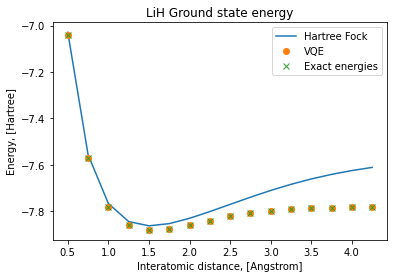

In [ ]:
pylab.plot(distances,hf_energies,label='Hartree Fock')
pylab.plot(distances,vqe_energies,'o',label='VQE')
pylab.plot(distances,exact_energies,'x', label='Exact energies')

pylab.xlabel('Interatomic distance, [Angstrom]')
pylab.ylabel('Energy, [Hartree]')
pylab.title('LiH Ground state energy')
pylab.legend(loc='upper right')